# Code 3

In [ ]:
import pandas as pd
from pyproj import Transformer
import numpy as np
import os
print(os.getcwd())
os.chdir("..")
import matplotlib.pyplot as plt
import folium
from folium import plugins
import matplotlib.colors as mcolors

c:\Users\ares\Desktop\Andrea\Leiden\Leiden University\Semestre 3\Statistical Consulting\Assignment\Submission code\Scientific


In [ ]:
df_merged=pd.read_csv("Data/Scientific Data/merged_dataset.csv", sep=";")
x = df_merged.iloc[0, 2:]
y = df_merged.iloc[1, 2:]

# Create the transformer object
t = Transformer.from_crs("EPSG:28992", "EPSG:4326", always_xy=True)
x.values,y.values
def to_float_clean(s):
    # convert to string and strip whitespace
    s = pd.Series(s).astype(str).str.strip()

    # Nan value standardization
    s = s.replace({"": np.nan, "nan": np.nan, "None": np.nan})
    s = s.str.replace(".", "", regex=False)
    s = s.str.replace(",", ".", regex=False)
    return pd.to_numeric(s, errors="coerce")
x_num = to_float_clean(x)
y_num = to_float_clean(y)
# 
lon, lat = t.transform(x_num.values, y_num.values)

df_merged.loc["Latitude (deg)"] = [None] + [None]+ list(lat)  
df_merged.loc["Longitude (deg)"] = [None] +[None] + list(lon)
df_merged.iloc[0, 2:] = lon
df_merged.iloc[1, 2:] = lat 
df_merged.iat[0, 0] = "Longitude (deg)"
df_merged.iat[1, 0] = "Latitude (deg)"

df_merged
df_merged.to_csv("Final data.csv", index=False, sep=";")  


In [3]:
lon,lat

(array([  83.36822837,   83.36880756,   83.2753723 ,   83.19022735,
          83.29227687,   83.28602533,   83.34872495,   83.36536364,
          83.3566279 ,   83.39633365,   83.37910381,   83.40748864,
          83.31544636,   83.27037553,   83.4282289 ,   83.31625561,
          83.33061917,   83.38522642,   83.37408707,   83.44938651,
          83.48266144,   83.44846796,   83.34911448,   83.37761199,
          83.34223143,   83.24318078,   83.22137069,   83.12327213,
          83.14974606,   83.2201868 ,   83.27138223,   83.29693037,
          83.30227716,   83.32502371,   83.35590151,   83.43379562,
          83.51061396,   83.47058968,   83.4086162 ,   83.40833741,
          83.31367358,   83.38243008,   83.35727718,   83.45543405,
          83.47943291,   83.36161499,   83.44487781,   83.2122292 ,
          83.39406177,   83.47784534,   83.35666746,   83.34033872,
          83.37615784,   83.30056765,   83.18978728,   83.39756736,
          83.37488419,   83.27192179,   83.40768

In [ ]:
# Select only the data rows (excluding the first two rows)
data_only = df_merged.iloc[2:, :]
# Convert all data to numeric, coercing errors to NaN
numeric_data = data_only.apply(pd.to_numeric, errors='coerce')
# Compute the mean for each column, ignoring NaN values
means = numeric_data.mean(axis=0, skipna=True)
# Add the index label for the mean row
df_merged.loc["Mean"] = means
df_merged.iat[df_merged.index.get_loc("Mean"), 0] = "Mean"
df_merged = pd.concat([
    df_merged.iloc[:2],
    df_merged.loc[["Mean"]],
    df_merged.iloc[2:]
])
df_merged

,Species,Name,Area 1,Area 2,Area 3,Area 4,Area 5,Area 6,Area 7,Area 8,...,Area 93,Area 94,Area 95,Area 96,Area 97,Area 98,Area 99,Area 100,Area 101,Area 102
0,Longitude (deg),NaN,83.368228,83.368808,83.275372,83.190227,83.292277,83.286025,83.348725,83.365364,...,-174.698347,-174.698336,83.322659,83.335227,83.370399,83.385067,-174.698336,-174.698336,inf,inf
1,Latitude (deg),NaN,76.849891,76.850014,76.825094,76.847151,76.818591,76.820857,76.807950,76.813014,...,-52.423191,-52.42319,76.836089,76.836345,76.824517,76.822562,-52.42319,-52.42319,inf,inf
Mean,Mean,NaN,9.573937,8.006631,8.336378,6.447604,8.738555,9.236896,6.348303,10.527135,...,-4.624881,-2.387731,10.707937,9.507799,8.607797,9.691256,-12.393964,-4.337834,inf,inf
2,Hogere plant,Achillea millefolium - Duizendblad,8.000000,NaN,2.000000,8.000000,8.000000,2.000000,8.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,Hogere plant,Aira caryophyllea - Zilverhaver,8.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,Hogere plant,Rhododendron ponticum - Pontische rododendron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,0.0,NaN
394,Hogere plant,Sorbus intermedia - Zweedse lijsterbes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN
Latitude (deg),NaN,NaN,76.849891,76.850014,76.825094,76.847151,76.818591,76.820857,76.807950,76.813014,...,-52.423191,-52.42319,76.836089,76.836345,76.824517,76.822562,-52.42319,-52.42319,inf,inf
Longitude (deg),NaN,NaN,83.368228,83.368808,83.275372,83.190227,83.292277,83.286025,83.348725,83.365364,...,-174.698347,-174.698336,83.322659,83.335227,83.370399,83.385067,-174.698336,-174.698336,inf,inf


Punti validi: 100
Lon range: -174.69834658125873 83.51168345088061
Lat range: -52.42319087830515 76.86340464543322


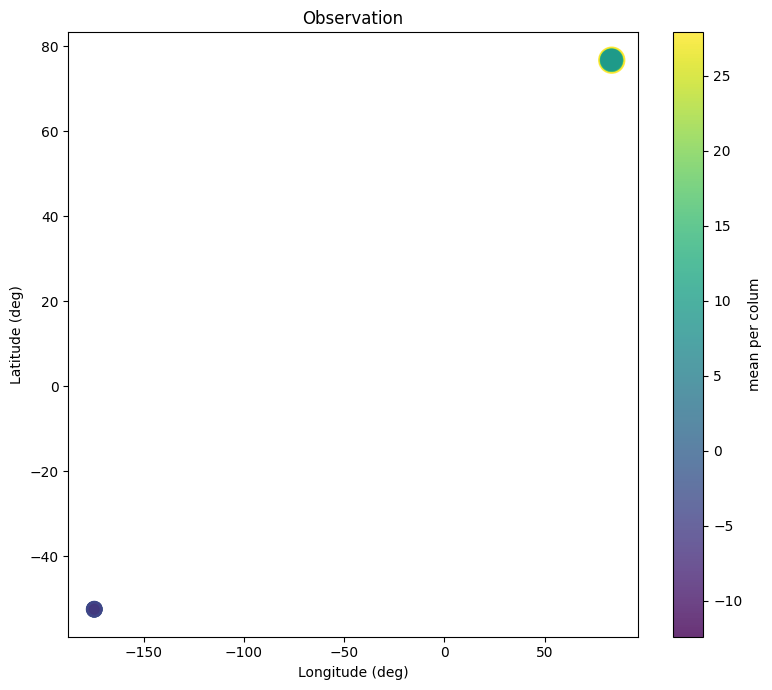

In [ ]:
x = pd.to_numeric(df_merged.iloc[0, 2:], errors="coerce")
y = pd.to_numeric(df_merged.iloc[1, 2:], errors="coerce")

first_col = df_merged.columns[0]
mean_row = None
is_mean = df_merged[first_col].astype(str).str.strip().str.lower().eq("mean")
if is_mean.any():
    mean_row = pd.to_numeric(df_merged.loc[is_mean].iloc[0, 2:], errors="coerce")
else:
    mean_row = pd.to_numeric(df_merged.iloc[2, 2:], errors="coerce")
x = x.replace([np.inf, -np.inf], np.nan)
y = y.replace([np.inf, -np.inf], np.nan)
mean_row = mean_row.replace([np.inf, -np.inf], np.nan)
valid = x.notna() & y.notna() & mean_row.notna()
xv, yv, mv = x[valid].values, y[valid].values, mean_row[valid].values

print("Punti validi:", len(mv))
print("Lon range:", np.nanmin(xv), np.nanmax(xv))
print("Lat range:", np.nanmin(yv), np.nanmax(yv))
lon, lat = xv, yv
m_min, m_max = np.nanmin(mv), np.nanmax(mv)
sizes = 50 + 300 * (mv - m_min) / (m_max - m_min) if m_max > m_min else np.full_like(mv, 100.0)
plt.figure(figsize=(8, 7))
sc = plt.scatter(lon, lat, s=sizes, c=mv, alpha=0.8)
plt.xlabel("Longitude (deg)")
plt.ylabel("Latitude (deg)")
plt.title("Observation")
cb = plt.colorbar(sc)
cb.set_label("mean per colum")
plt.tight_layout()
plt.show()

In [6]:
def row_by_species_first(df, species_label, cols_slice):
    mask = df["Species"].astype(str).str.strip().str.lower().eq(species_label.lower())
    if not mask.any():
        raise ValueError(f"Riga con Species == '{species_label}' non trovata")
    first_idx = df.index[mask][0]
    s = df.loc[first_idx, cols_slice]
    if isinstance(s, pd.DataFrame):
        s = s.iloc[0]
    return pd.to_numeric(s, errors="coerce")

areas = df_merged.columns[2:]  
lon = row_by_species_first(df_merged, "Longitude (deg)", areas).replace([np.inf, -np.inf], np.nan)
lat = row_by_species_first(df_merged, "Latitude (deg)", areas).replace([np.inf, -np.inf], np.nan)
mv  = row_by_species_first(df_merged, "Mean",            areas).replace([np.inf, -np.inf], np.nan)

valid = lon.notna() & lat.notna() & mv.notna()
lon, lat, mv = lon[valid].astype(float).values, lat[valid].astype(float).values, mv[valid].astype(float).values
if len(mv) == 0:
    raise ValueError("No valid data points found for mapping.")

m_min, m_max = float(np.nanmin(mv)), float(np.nanmax(mv))
sizes = 5 + 20 * (mv - m_min) / (m_max - m_min) if m_max > m_min else np.full_like(mv, 10.0)

def color_from_value(v):
    r = (v - m_min) / (m_max - m_min) if m_max > m_min else 0.5
    return mcolors.to_hex((r, 0, 1 - r)) 

points_fg = folium.FeatureGroup(name="Punti (size & color ~ Mean)", show=True)
for lo, la, val, sz in zip(lon, lat, mv, sizes):
    folium.CircleMarker(
        location=[la, lo],
        radius=float(sz),
        color=color_from_value(val),
        fill=True,
        fill_color=color_from_value(val),
        fill_opacity=0.7,
        popup=f"Mean: {val:.3f}"
    ).add_to(points_fg)

heat_data = [[la, lo, float(v)] for lo, la, v in zip(lon, lat, mv)]
heat_fg = plugins.HeatMap(
    heat_data, radius=25, blur=20, max_zoom=17, name="HeatMap (pesata da Mean)", show=False
)

center = [float(np.nanmean(lat)), float(np.nanmean(lon))]
m = folium.Map(location=center, zoom_start=15, tiles=None)

folium.TileLayer("CartoDB positron",    name="Chiara (Positron)", show=True).add_to(m)
folium.TileLayer("CartoDB dark_matter", name="Scura (Dark Matter)", show=False).add_to(m)
folium.TileLayer("OpenStreetMap",       name="OpenStreetMap", show=False).add_to(m)
folium.TileLayer(
    tiles="https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}",
    attr="Esri",
    name="Satellite (Esri)",
    show=False
).add_to(m)

# Aggiungi layer vettoriali UNA sola volta
points_fg.add_to(m)
heat_fg.add_to(m)

# Controllo layer e salvataggio
folium.LayerControl(collapsed=False).add_to(m)
m.save("mappa_osservazioni_ultima.html")
print("Salvata: mappa_osservazioni_ultima.html")



Salvata: mappa_osservazioni_ultima.html


In [7]:
df_merged.shape

(399, 104)